# Projeto #1 - Análise Exploratória de Dados

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela?

A base escolhida é um dataset real dos gastos de manutenção em locomotivas no periodo ytd de 2019. Nosso desafio é categorizar os planos de **manutenção** e o detalhamento para registros que não possuem lista de tarefa denifida. A lista de tarefa é uma feature que determinaria o plano de manutenção e seu detalhamento, porém há situações onde o usuário não informa corretamente tal atributo, impossibilitando de maneira simplificada tal categorização.

### 2) **(5%)** Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).
- Identificação da variável a serem trabalhadas
- Classificação das variáveis como: contínua (monetario) ou discreta (dominio).

Descrição da base e suas variáveis*

emp_nm_empresa : nome da empresa proprietaria da locomotiva : discreta
doc_no_periodo_ano : periodo : discreta
doc_cd_centro_custo_origem : centro de custo que recebe o gasto: discreta
cdco_ds_centro_custo : descricao do centro de custo
doc_no_ordem : numero da ordem de manutenção
ord_cd_tipo_ordem : codigo do tipo da ordem de manutencao
orm_ds_tipo_ordem : descricao do tipo da ordem de manutencao
ord_cd_lista_grupo_tarefa : codigo da lista de tarefa da manutencao
ord_ds_texto_breve : descricao da lista da tarefa da manutencao
tpd_ds_tipo_documento : descricao do tipo de documento utilizado na ordem de manutencao
doc_no_conta_razao : numero da conta contabil
ctc_ds_conta_razao : descricao da conta contabil
pacote : pacote agrupador de conta contabil
subpacote : subpacote agrupador de conta contabil
orm_no_equipamento : numero patrimonial da locomotiva
orm_ds_equipamento : descricao da locomotiva
for_nm_fornecedor : nome do fornecedor 
doc_no_pedido_compras : numero do pedido de compras, quando despesa alocada direto ao centro de custo
doc_no_material : codigo do material 
mat_ds_material : descricao do material
ds_material_servico : genero do material ou servico
mat_cd_grupo_mercadoria : codigo do grupo do material
ds_grupo_material : descricao do grupo do material
doc_cd_tipo_avaliacao : tipo de avaliacao do material (novo, usuado, recuperado...)
doc_cd_definicao_projeto : codigo de definicao do projeto, caso considere-se investimento: 
doc_cd_unidade_medida_basica : unidade de medida do material ou servico
doc_qt : quantidade 
doc_vl_unitario_moeda_interna : valor unitario
doc_vl_moeda_interna : valor total
ds_chave_lancamento : chave de lancamento contabil (debito ou credito)
sn_maquina_via : numero binario, identifica se o equipamento e considerado como maquina de via para manutencao (0 = nao; 1 = sim)
cd_frota_equipamento : codigo de frota de frota de locomotivas
ds_corretiva_preventiva : manutencao preventiva ou corretiva ?
ds_tipo_plano : descricao do plano de manutencao
ds_detalhamento : detalhamento do plano de manutencao

### 2) **(15%)** Faça uma avaliação descritiva da sua base. Quantas linhas ela possui? Quais os tipos de dados? Quantas e quais features possuem?

Cada variável escolhida pelo aluno precisa passar por ao menos 1 pré-processamento. O pré-processamento pode ser (mas não está limitado a):
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [65]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
import numpy as np
import pandas as pd
pd.__version__

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# CARREGAR A BASE
data_set = "/content/drive/My Drive/04 - UNI-BH/POS/PROJETO_1/data_aed_projeto1.csv" # data set com apenas 50 registros para testes
#data_set = "/content/drive/My Drive/04 - UNI-BH/POS/PROJETO_1/data3_aed_projeto1.csv" # data set completo

features = ["emp_nm_empresa",
            "doc_no_periodo_ano",
            "doc_cd_centro_custo_origem",
            "cdco_ds_centro_custo",
            "doc_no_ordem",
            "ord_cd_tipo_ordem",
            "orm_ds_tipo_ordem",
            "ord_cd_lista_grupo_tarefa","ord_ds_texto_breve",
            "tpd_ds_tipo_documento",
            "doc_no_conta_razao",
            "ctc_ds_conta_razao",
            "pacote",
            "subpacote",
            "orm_no_equipamento",
            "orm_ds_equipamento",
            "for_nm_fornecedor",
            "doc_no_pedido_compras",
            "doc_no_material",
            "mat_ds_material",
            "ds_material_servico",
            "mat_cd_grupo_mercadoria",
            "ds_grupo_material",
            "doc_cd_tipo_avaliacao",
            "doc_cd_definicao_projeto",
            "doc_cd_unidade_medida_basica",
            "doc_qt",
            "doc_vl_unitario_moeda_interna",
            "doc_vl_moeda_interna",
            "ds_chave_lancamento",
            "sn_maquina_via",
            "cd_frota_equipamento",
            "ds_corretiva_preventiva",
            "ds_tipo_plano",
            "ds_detalhamento"]

df = pd.read_csv(data_set
    ,names=features
    ,sep=r';'
    ,header=1 
    ,encoding='utf8' # considera acentuacao
    ,engine='python')
    #,na_values="?").dropna() # apaga tuplas com pelo menos uma feature fazia


Mounted at /content/drive


In [67]:
# como estao os dados
df.head(5)
# qual o tamanho do data_frame ?
df.shape

(42778, 35)

In [70]:
#  VERIFICAR TIPOS DE DADOS DE CADA FEATURE
df.dtypes

emp_nm_empresa                    object
doc_no_periodo_ano                 int64
doc_cd_centro_custo_origem        object
cdco_ds_centro_custo              object
doc_no_ordem                       int64
ord_cd_tipo_ordem                 object
orm_ds_tipo_ordem                 object
ord_cd_lista_grupo_tarefa         object
ord_ds_texto_breve                object
tpd_ds_tipo_documento             object
doc_no_conta_razao                 int64
ctc_ds_conta_razao                object
pacote                            object
subpacote                         object
orm_no_equipamento                object
orm_ds_equipamento                object
for_nm_fornecedor                 object
doc_no_pedido_compras            float64
doc_no_material                  float64
mat_ds_material                   object
ds_material_servico               object
mat_cd_grupo_mercadoria           object
ds_grupo_material                 object
doc_cd_tipo_avaliacao             object
doc_cd_definicao

In [69]:
# EXTRAIR COLUNAS CATEGORICAS (dtype == "O" (object))
df[[c for c in df.columns if df[c].dtypes == "O"]]

,emp_nm_empresa,doc_cd_centro_custo_origem,cdco_ds_centro_custo,ord_cd_tipo_ordem,orm_ds_tipo_ordem,ord_cd_lista_grupo_tarefa,ord_ds_texto_breve,tpd_ds_tipo_documento,ctc_ds_conta_razao,pacote,subpacote,orm_no_equipamento,orm_ds_equipamento,for_nm_fornecedor,mat_ds_material,ds_material_servico,mat_cd_grupo_mercadoria,ds_grupo_material,doc_cd_tipo_avaliacao,doc_cd_definicao_projeto,doc_cd_unidade_medida_basica,doc_qt,doc_vl_unitario_moeda_interna,doc_vl_moeda_interna,ds_chave_lancamento,cd_frota_equipamento,ds_corretiva_preventiva,ds_tipo_plano,ds_detalhamento
0,Ferrovia Centro Atlântica,13F0110151,CTRAB MR. OFIC. DIVINOPOLIS REPARO LEVE,MCTC,Corretiva Material Rodante – Custeio,NaN,OBC AVARIADO,Saída merc.depósito,Peças e Componentes de Locomotivas,Manutenção,Materiais Manut. Industrial,9048162,LOCOMOTIVA SD40 904816-2,NaN,H-SAPAT 37A SIDEREA T536 TERMOLITE,material,M5312179,SAPATAS LOCOMOTIVA,NOVO,NaN,PC,8,"71,74625","573,97",Debito,SD40,Corretiva,Corretiva,Troca de Sapata
1,Ferrovia Centro Atlântica,13F0110155,CTRAB MR. OFIC. LOCOMOTIVA LAVRAS,MCTC,Corretiva Material Rodante – Custeio,NaN,20/09/2019 IP CORRETIVAS NÃO PROGRAMADAS,Saída merc.depósito,Peças e Componentes de Locomotivas,Manutenção,Materiais Manut. Industrial,9061096,LOCOMOTIVA MX 906109-6,NaN,H-SAPATA FREIO 86 SIDEREA,material,M5312179,SAPATAS LOCOMOTIVA,NOVO,NaN,PC,4,"67,9625","271,85",Debito,MX,Corretiva,Corretiva,Troca de Sapata
2,Ferrovia Centro Atlântica,13F0110162,CTRAB MR. OFIC. LOCOMOTIVA ALAGOINHAS,MCTC,Corretiva Material Rodante – Custeio,NaN,MANUTENÇÃO CORRETIVA - 3206,Saída merc.depósito,Peças e Componentes de Locomotivas,Manutenção,Materiais Manut. Industrial,9132066,LOCOMOTIVA U12 913206-6,NaN,SAPAT FREIO LOCOM 5 SIDEREA,material,M5312179,SAPATAS LOCOMOTIVA,NOVO,NaN,PC,4,"168,19","672,76",Debito,U12,Corretiva,Corretiva,Troca de Sapata
3,Ferrovia Centro Atlântica,13F0110155,CTRAB MR. OFIC. LOCOMOTIVA LAVRAS,MCTC,Corretiva Material Rodante – Custeio,NaN,02/05/19 IP CORRETIVAS NÃO PROGRAMADAS,Saída merc.depósito,Peças e Componentes de Locomotivas,Manutenção,Materiais Manut. Industrial,9107207,LOCOMOTIVA BB36 910720-7,NaN,H-SAPATA FREIO 86 SIDEREA,material,M5312179,SAPATAS LOCOMOTIVA,NOVO,NaN,PC,6,"67,96333333","407,78",Debito,BB36,Corretiva,Corretiva,Troca de Sapata
4,Ferrovia Centro Atlântica,13F0110155,CTRAB MR. OFIC. LOCOMOTIVA LAVRAS,MCTC,Corretiva Material Rodante – Custeio,NaN,27/05/19 IP CORRETIVAS PROGRAMADAS,Saída merc.depósito,Peças e Componentes de Locomotivas,Manutenção,Materiais Manut. Industrial,9107487,LOCOMOTIVA BB36 910748-7,NaN,H-SAPATA FREIO 86 SIDEREA,material,M5312179,SAPATAS LOCOMOTIVA,NOVO,NaN,PC,2,"67,965","135,93",Debito,BB36,Corretiva,Corretiva,Troca de Sapata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42773,Ferrovia Centro Atlântica,13F0110164,CTRAB MR. OFIC. LOCOMOTIVA MONTES CLAROS,MPVC,Preventiva Material Rodante – Custeio,MLU20100,MANUT PREV PLANO LOC IP U20,Saída merc.depósito,Graxas,Manutenção,Materiais Div. Manut.,9026908,LOCOMOTIVA U20 902690-8,NaN,H-GRAXA OLEO MINER REF ASF CX 40UNIX500,material,M5910860,GRAXA,NOVO,NaN,PC,40,"7,16225","286,49",Debito,U20,Preventiva,Rodeiro Roda Nova,IP/IC
42774,Ferrovia Centro Atlântica,13F0110164,CTRAB MR. OFIC. LOCOMOTIVA MONTES CLAROS,MPVC,Preventiva Material Rodante – Custeio,MLU20100,MANUT PREV PLANO LOC IP U20,Saída merc.depósito,Graxas,Manutenção,Materiais Div. Manut.,9026851,LOCOMOTIVA U20 902685-1,NaN,H-GRAXA OLEO MINER REF ASF CX 40UNIX500,material,M5910860,GRAXA,NOVO,NaN,PC,16,"5,766875","92,27",Debito,U20,Preventiva,Rodeiro Roda Nova,IP/IC
42775,Ferrovia Centro Atlântica,13F0110164,CTRAB MR. OFIC. LOCOMOTIVA MONTES CLAROS,MPVC,Preventiva Material Rodante – Custeio,MLU20100,MANUT PREV PLANO LOC IP U20,Saída merc.depósito,Graxas,Manutenção,Materiais Div. Manut.,9025235,LOCOMOTIVA U20 902523-5,NaN,H-GRAXA OLEO MINER REF ASF CX 40UNIX500,material,M5910860,GRAXA,NOVO,NaN,PC,40,"5,868","234,72",Debito

In [73]:
# EXTRAIR COLUNAS NUMERICAS (dtype != "O" (object))
df[[c for c in df.columns if df[c].dtypes != "O"]]

,doc_no_periodo_ano,doc_no_ordem,doc_no_conta_razao,doc_no_pedido_compras,doc_no_material,sn_maquina_via
0,201905,4515894,340012001,NaN,30038642.0,NaN
1,201909,4697926,340012001,NaN,30038652.0,NaN
2,201908,4499258,340012001,NaN,30038648.0,NaN
3,201905,4497168,340012001,NaN,30038652.0,NaN
4,201905,4530772,340012001,NaN,30038652.0,NaN
...,...,...,...,...,...,...
42773,201904,4423726,340010005,NaN,20004526.0,NaN
42774,201901,4374010,340010005,NaN,20004526.0,NaN
42775,201906,4535961,340010005,NaN,20004526.0,NaN
42776,201905,4490214,340010005,NaN,20004526.0,NaN


In [89]:
# PERCENTUAL DE ELEMENTOS NULOS
round(df.isnull().mean()*100,2)

emp_nm_empresa                     0.00
doc_no_periodo_ano                 0.00
doc_cd_centro_custo_origem         0.00
cdco_ds_centro_custo               0.00
doc_no_ordem                       0.00
ord_cd_tipo_ordem                  0.00
orm_ds_tipo_ordem                  0.00
ord_cd_lista_grupo_tarefa         52.59
ord_ds_texto_breve                 0.00
tpd_ds_tipo_documento              0.00
doc_no_conta_razao                 0.00
ctc_ds_conta_razao                 0.00
pacote                             0.00
subpacote                          0.00
orm_no_equipamento                 0.00
orm_ds_equipamento                 0.00
for_nm_fornecedor                 98.93
doc_no_pedido_compras             98.93
doc_no_material                    0.70
mat_ds_material                    0.70
ds_material_servico                0.00
mat_cd_grupo_mercadoria            0.70
ds_grupo_material                  0.70
doc_cd_tipo_avaliacao              0.00
doc_cd_definicao_projeto          96.61


### 4) **(60%)** Nos blocos seguintes construa análises que vão justificar suas conclusões.

#### 4.1) **(20%)** Análise 1 -  Distribuição dos valores para cada uma das variáveis
- Exemplo para variável contínua: se o conjunto de dados possui a variável "idade". Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?

- Exemplo para variável discreta: se o conjunto de dados possui a variável "gênero", quantos % do conjunto de dados é do sexo feminino, quantos % é masculino? Inclua outros gêneros se houver.


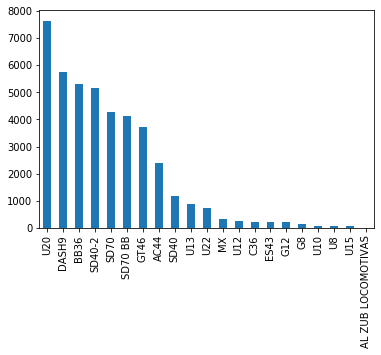

In [86]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

# quantidade de ordem de manutencao por frota de locomotiva
df["cd_frota_equipamento"].value_counts().plot(kind="bar")



In [84]:
# percentual de manutencao preventiva de custeio (MPVC) por tipo de locomotiva.
df[df["ord_cd_tipo_ordem"] == "MPVC"]["cd_frota_equipamento"].value_counts(normalize=True)

U20        0.162420
DASH9      0.160146
SD70 BB    0.135325
SD40-2     0.120716
GT46       0.113285
SD70       0.086897
BB36       0.056870
AC44       0.053534
U13        0.028612
SD40       0.027955
U22        0.011475
ES43       0.008644
U12        0.006369
C36        0.006319
MX         0.006319
G12        0.004145
G8         0.003539
U10        0.003084
U8         0.002426
U15        0.001921
Name: cd_frota_equipamento, dtype: float64

In [90]:
# percentual de manutencao corretiva de custeio (MCTC) por tipo de locomotiva.
df[df["ord_cd_tipo_ordem"] == "MCTC"]["cd_frota_equipamento"].value_counts(normalize=True) 
#R: a frota de locomotivas U20 sao as mais antigas. Necessitam de maior intervencao para correcao e prevencao

U20                   0.203082
BB36                  0.186626
SD40-2                0.125083
SD70                  0.104157
DASH9                 0.099496
SD70 BB               0.063303
GT46                  0.059736
AC44                  0.057310
SD40                  0.028821
U22                   0.023067
U13                   0.013555
MX                    0.009369
G12                   0.006563
U12                   0.005089
C36                   0.004994
G8                    0.004280
ES43                  0.002711
U15                   0.000999
U8                    0.000904
U10                   0.000761
AL ZUB LOCOMOTIVAS    0.000095
Name: cd_frota_equipamento, dtype: float64

#### 4.2) **(20%)** Análise 2 - Dependência entre variáveis
O aluno deve apresentar as mesmas distribuições para cada valor da variável dependente. Exemplo: Em um conjunto de dados em que as variáveis independentes são idade e sexo, e a variável dependente é renda. O aluno pode dividir a renda em 3 "grupos", <1000 reais, entre 1000 e 10000 reais e >1000 reais. Para cada um desses grupos, é necessário apresentar a distribuição das variáveis "idade" e "sexo".


In [0]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

#### 4.3) **(20%)** Análise 3 - Correlação entre variáveis

O aluno deve apresentar 3 análises de correlação entre variáveis do conjunto de dados trabalhado. Exemplo: Em um conjunto de dados com as informações de temperatura e ocorrência de incêndios, eu gostaria de saber a incidência de correlação entre as duas variáveis.



In [0]:
# Primeiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [0]:
# Segundo par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [0]:
# Terceiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

### 5) Conclusões **15%**

*O que é possível concluir com os dados que você analisou? Se fosse fazer uma apresentação, o que levaria como os maiores destaques e por que?*

In [91]:
# GOD MODE!!!
import pandas_profiling
pandas_profiling.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,35
Number of observations,42778
Total Missing (%),12.9%
Total size in memory,11.4 MiB
Average record size in memory,280.0 B
Numeric,5
Categorical,29
Boolean,0
Date,0
Text (Unique),0
Rejected,1
